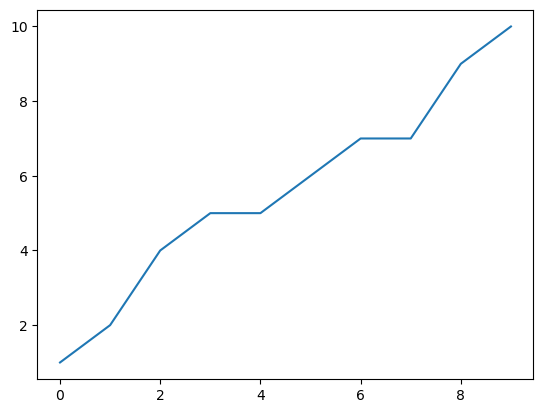

In [5]:
from matplotlib import pyplot as plt

X = list(range(10))
Y = [1,2,4,5,5,6,7,7,9,10]

plt.plot(X, Y)

In [7]:

def h(w, x):
    return w*x

class H():
    def __init__(self, w):
        self.w = w
    def forward(self, x):
        return self.w  * x

def cost(h, X, Y):
    # Cost = sigma((w*x[i]-y[i])**2)/len(X)
    error = 0
    for i in range(len(X)):
        error += (h.forward(X[i]) - Y[i])**2
    error /= len(X)
    return error

h = H(4)
cost(h, X, Y)



232.2

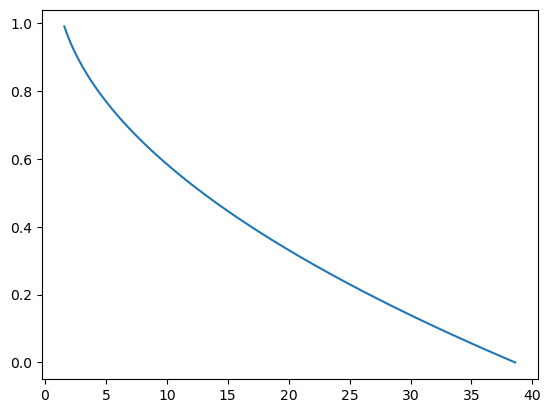

In [9]:
list_w = []
list_c = []
for i in range(100):
    w = i * 0.01
    h=H(w)
    c = cost(h, X, Y)
    list_c.append(c)
    list_w.append(w)
plt.plot(list_c, list_w)

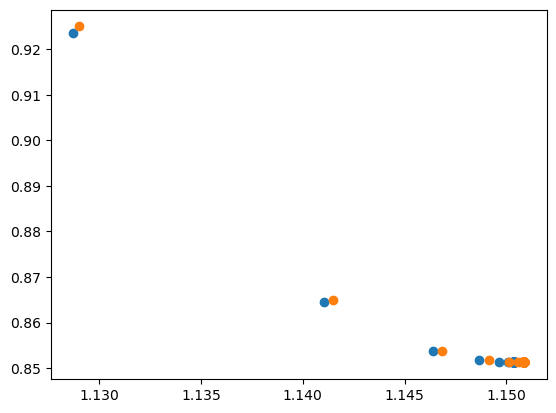

In [15]:
#수치 해석적 Gradient
def gradient(w, cost):
    h=H(w)
    cost1 = cost(h, X, Y)
    epsilon = 0.001
    h_2 = H(w+epsilon)
    cost2 = cost(h_2, X, Y)
    # gradient = delta(cost)/epsilon
    d_cost = cost2 - cost1
    grad = d_cost / epsilon
    mean_cost = (cost1 + cost2) / 2
    return grad, mean_cost

#편미분을 사용한 Gradient
def gradient2(w, cost):
    h=H(w)
    grad = 0
    for i in range(len(X)):
        grad += 2*(h.forward(X[i]) - Y[i]) * X[i]
    grad /= len(X)
    return grad, cost(h,X,Y)

list_w1 = []
list_c1 = []
list_w2 = []
list_c2 = []
learning_rate = 0.01
w1 = 1.1
w2 = 1.1

for i in range(100):
    grad, mean_cost = gradient(w1, cost)
    grad_2, mean_cost_2 = gradient2(w2, cost)
    w1 -= learning_rate * grad
    w2 -= learning_rate * grad_2
    list_w1.append(w1)
    list_w2.append(w2)
    list_c1.append(mean_cost)
    list_c2.append(mean_cost_2)
plt.scatter(list_w1, list_c1)
plt.scatter(list_w2, list_c2)